## Pattern Instance

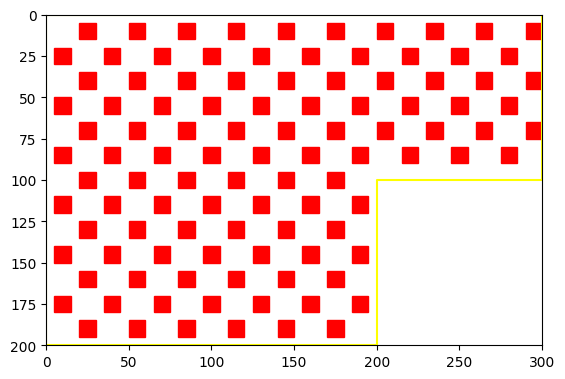

Total bricks placed: 105


In [130]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from shapely.geometry import Polygon, Point

# Define your house shape and brick parameters
house_shape = Polygon([(0, 0), (300, 0), (300, 100), (200, 100), (200, 200), (0, 200)])
brick_width = 10  # mm
brick_height = 10  # mm
gap_x = 5
gap_y = 5
pattern = [[0, 1], [1, 0]]  # Pattern matrix

def lay_bricks(house_shape, brick_width, brick_height, gap_x, gap_y, pattern):
    fig, ax = plt.subplots()
    x_min, y_min, x_max, y_max = house_shape.bounds
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_aspect('equal')

    x, y = house_shape.exterior.xy
    ax.plot(x, y, color='yellow')

    num_rows = int((y_max - y_min) // (brick_height + gap_y))
    num_cols = int((x_max - x_min) // (brick_width + gap_x))

    pattern_height = len(pattern)
    pattern_width = len(pattern[0])

    bricks = []
    for i in range(num_rows + 1):
        for j in range(num_cols + 1):
            # Check pattern to see if a brick should be placed
            if pattern[i % pattern_height][j % pattern_width] == 1:
                brick_origin = Point(x_min + j * (brick_width + gap_x) + gap_x,
                                     y_min + i * (brick_height + gap_y) + gap_y)
                brick = Polygon([
                    (brick_origin.x, brick_origin.y),
                    (brick_origin.x + brick_width, brick_origin.y),
                    (brick_origin.x + brick_width, brick_origin.y + brick_height),
                    (brick_origin.x, brick_origin.y + brick_height)
                ])
                if house_shape.contains(brick):
                    bricks.append(brick)

    # Draw bricks
    for brick in bricks:
        ax.add_patch(patches.Polygon(xy=list(brick.exterior.coords), closed=True, fill=True, edgecolor='red', facecolor='red'))

    plt.gca().invert_yaxis()
    plt.show()
    print(f'Total bricks placed: {len(bricks)}')

# Example usage
lay_bricks(house_shape, brick_width, brick_height, gap_x, gap_y, pattern) 


# Pattern & Percentages

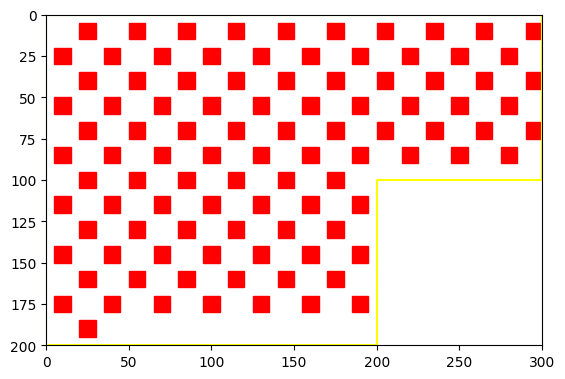

Total bricks placed: 100


In [85]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from shapely.geometry import Polygon, Point

# Define your house shape and brick parameters
house_shape = Polygon([(0, 0), (300, 0), (300, 100), (200, 100), (200, 200), (0, 200)])
brick_width = 10  # mm
brick_height = 10  # mm
gap_x = 5
gap_y = 5
pattern = [[0, 1, 0, 1], [1, 0, 1, 0]]  # Pattern matrix

def lay_bricks(house_shape, brick_width, brick_height, gap_x, gap_y, pattern, percentage):
    fig, ax = plt.subplots()
    x_min, y_min, x_max, y_max = house_shape.bounds
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_aspect('equal')

    x, y = house_shape.exterior.xy
    ax.plot(x, y, color='yellow')

    area_house = house_shape.area
    brick_area = brick_width * brick_height
    total_bricks_possible = area_house // brick_area
    bricks_to_place = int(total_bricks_possible * (percentage / 100))

    num_rows = int((y_max - y_min) // (brick_height + gap_y))
    num_cols = int((x_max - x_min) // (brick_width + gap_x))

    pattern_height = len(pattern)
    pattern_width = len(pattern[0])

    bricks = []
    bricks_placed = 0

    for i in range(num_rows + 1):
        for j in range(num_cols + 1):
            if bricks_placed >= bricks_to_place:
                break
            # Check pattern to see if a brick should be placed
            if pattern[i % pattern_height][j % pattern_width] == 1:
                brick_origin = Point(x_min + j * (brick_width + gap_x) + gap_x,
                                     y_min + i * (brick_height + gap_y) + gap_y)
                brick = Polygon([
                    (brick_origin.x, brick_origin.y),
                    (brick_origin.x + brick_width, brick_origin.y),
                    (brick_origin.x + brick_width, brick_origin.y + brick_height),
                    (brick_origin.x, brick_origin.y + brick_height)
                ])
                if house_shape.contains(brick):
                    bricks.append(brick)
                    bricks_placed += 1

    # Draw bricks
    for brick in bricks:
        ax.add_patch(patches.Polygon(xy=list(brick.exterior.coords), closed=True, fill=True, edgecolor='red', facecolor='red'))

    plt.gca().invert_yaxis()
    plt.show()
    print(f'Total bricks placed: {len(bricks)}')

# Example usage
lay_bricks(house_shape, brick_width, brick_height, gap_x, gap_y, pattern, 20)  # Adjust percentage as needed



1. **Determine the Basic Pattern:** Choose or create a basic pattern such that the ratio of bricks to gaps in the pattern closely matches the required percentage. For example, if you need to cover 50% of the area, the basic pattern should have an equal ratio of 1s and 0s.

2. **Repeat the Pattern:** Repeat this pattern across the entire area uniformly. Ensure that the pattern is consistently repeated throughout the space that needs to be paved.

3. **Trim the Pattern (if necessary):** If the dimensions of the pattern do not perfectly fit the size of the area to be paved, you may need to trim a part of the pattern to make it fit.

In [125]:
import numpy as np

def create_uniform_pattern(area_width, area_height, brick_width, brick_height, gap_x, gap_y, percentage):
    # Calculate the number of columns and rows based on brick and gap sizes
    cols = int(area_width / (brick_width + gap_x))
    rows = int(area_height / (brick_height + gap_y))

    # Determine the number of bricks needed
    total_cells = cols * rows
    bricks_needed = int(total_cells * (percentage / 100))

    # Create an initial random pattern
    pattern = np.zeros(total_cells, dtype=int)
    brick_indices = np.random.choice(total_cells, bricks_needed, replace=False)
    pattern[brick_indices] = 1

    # Reshape to grid
    pattern_grid = pattern.reshape((rows, cols))

    return pattern_grid

# Example parameters
area_width = 50  # mm
area_height = 50  # mm
brick_width = 10  # mm
brick_height = 10  # mm
gap_x = 10  # mm
gap_y = 10  # mm
percentage = 50  # percent


pattern = create_uniform_pattern(area_width, area_height, brick_width, brick_height, gap_x, gap_y, percentage)
print(pattern)


[[1 0]
 [0 1]]


Now, try generate all the possible patterns for the given percentage and find the one that fits the area to be paved.

In [126]:
import numpy as np
from itertools import combinations

def create_all_patterns(area_width, area_height, brick_width, brick_height, gap_x, gap_y, percentage):
    # Calculate the number of columns and rows based on brick and gap sizes
    cols = int(area_width / (brick_width + gap_x))
    rows = int(area_height / (brick_height + gap_y))

    # Determine the number of bricks needed
    total_cells = cols * rows
    bricks_needed = int(total_cells * (percentage / 100))

    # All possible positions in a flat array
    positions = range(total_cells)

    # Generate all unique combinations of brick positions
    all_combinations = list(combinations(positions, bricks_needed))

    # Convert each combination into a grid pattern
    all_patterns = []
    for combo in all_combinations:
        pattern = np.zeros(total_cells, dtype=int)
        pattern[list(combo)] = 1  # Place bricks
        pattern_grid = pattern.reshape((rows, cols))
        all_patterns.append(pattern_grid)

    return all_patterns

# Example parameters
area_width = 50  # mm
area_height = 50  # mm
brick_width = 10  # mm
brick_height = 10  # mm
gap_x = 10  # mm
gap_y = 10  # mm
percentage = 50  # percent

# Generate all patterns
all_patterns = create_all_patterns(area_width, area_height, brick_width, brick_height, gap_x, gap_y, percentage)
for idx, pat in enumerate(all_patterns):
    print(f"Pattern {idx + 1}:\n", pat, "\n")


Pattern 1:
 [[1 1]
 [0 0]] 

Pattern 2:
 [[1 0]
 [1 0]] 

Pattern 3:
 [[1 0]
 [0 1]] 

Pattern 4:
 [[0 1]
 [1 0]] 

Pattern 5:
 [[0 1]
 [0 1]] 

Pattern 6:
 [[0 0]
 [1 1]] 



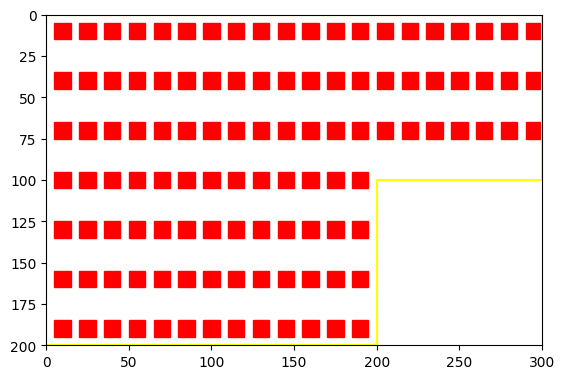

Total bricks placed: 112


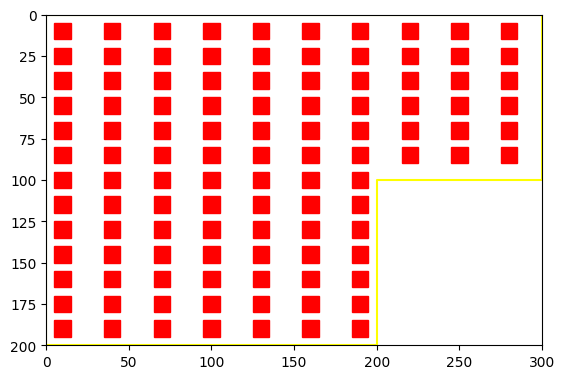

Total bricks placed: 109


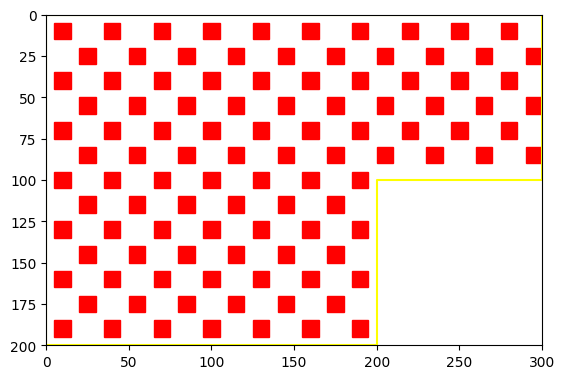

Total bricks placed: 106


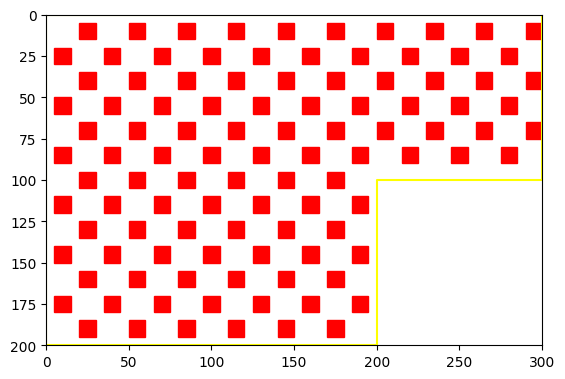

Total bricks placed: 105


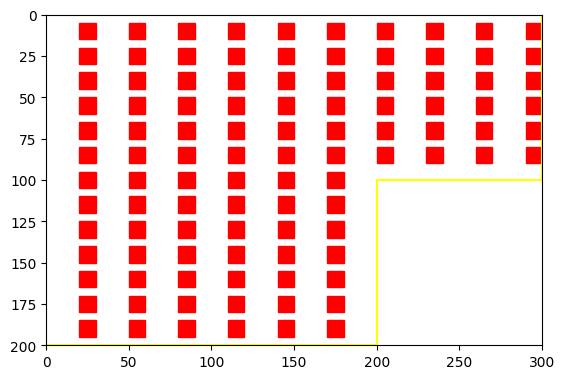

Total bricks placed: 102


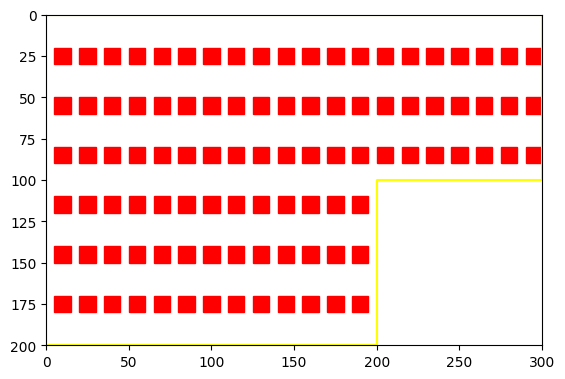

Total bricks placed: 99


In [131]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from shapely.geometry import Polygon, Point

# Define your house shape and brick parameters
house_shape = Polygon([(0, 0), (300, 0), (300, 100), (200, 100), (200, 200), (0, 200)])
brick_width = 10  # mm
brick_height = 10  # mm
gap_x = 5
gap_y = 5
pattern = [[0, 1], [1, 0]]  # Pattern matrix

def lay_bricks(house_shape, brick_width, brick_height, gap_x, gap_y, pattern):
    fig, ax = plt.subplots()
    x_min, y_min, x_max, y_max = house_shape.bounds
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_aspect('equal')

    x, y = house_shape.exterior.xy
    ax.plot(x, y, color='yellow')

    num_rows = int((y_max - y_min) // (brick_height + gap_y))
    num_cols = int((x_max - x_min) // (brick_width + gap_x))

    pattern_height = len(pattern)
    pattern_width = len(pattern[0])

    bricks = []
    for i in range(num_rows + 1):
        for j in range(num_cols + 1):
            # Check pattern to see if a brick should be placed
            if pattern[i % pattern_height][j % pattern_width] == 1:
                brick_origin = Point(x_min + j * (brick_width + gap_x) + gap_x,
                                     y_min + i * (brick_height + gap_y) + gap_y)
                brick = Polygon([
                    (brick_origin.x, brick_origin.y),
                    (brick_origin.x + brick_width, brick_origin.y),
                    (brick_origin.x + brick_width, brick_origin.y + brick_height),
                    (brick_origin.x, brick_origin.y + brick_height)
                ])
                if house_shape.contains(brick):
                    bricks.append(brick)

    # Draw bricks
    for brick in bricks:
        ax.add_patch(patches.Polygon(xy=list(brick.exterior.coords), closed=True, fill=True, edgecolor='red', facecolor='red'))

    plt.gca().invert_yaxis()
    plt.show()
    print(f'Total bricks placed: {len(bricks)}')

for pat in all_patterns:
    lay_bricks(house_shape, brick_width, brick_height, gap_x, gap_y, pat)
